In [109]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 

pd.set_option('display.max_columns', None) # Display all columns in DataFrame output.
pd.set_option('display.max_rows', None) # Display all rows in DataFrame output

1.Load Data from a CSV

In [110]:
df = pd.read_csv('data/Students.csv')

In [111]:
# Display the first 5 rows of the DataFrame.
df.head()

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Aarav,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,Vivaan,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Aditya,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Vihaan,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Arjun,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium


In [112]:
# Returns the number of rows and columns in this DataFrame.
df.shape

(3614, 16)

In [113]:
# Returns information about this DataFrame, including data types and non-null counts.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Student_Name               3614 non-null   object 
 1   College_Name               3614 non-null   object 
 2   Stream                     3614 non-null   object 
 3   Year_of_Study              3614 non-null   int64  
 4   AI_Tools_Used              3614 non-null   object 
 5   Daily_Usage_Hours          3614 non-null   float64
 6   Use_Cases                  3614 non-null   object 
 7   Trust_in_AI_Tools          3614 non-null   int64  
 8   Impact_on_Grades           3614 non-null   int64  
 9   Do_Professors_Allow_Use    3614 non-null   object 
 10  Preferred_AI_Tool          3614 non-null   object 
 11  Awareness_Level            3614 non-null   int64  
 12  Willing_to_Pay_for_Access  3614 non-null   object 
 13  State                      2000 non-null   objec

In [114]:
# Returns summary statistics for numerical columns in the DataFrame.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year_of_Study,3614.0,2.472883,1.107912,1.0,2.0,2.0,3.0,4.0
Daily_Usage_Hours,3614.0,2.559685,1.213319,0.5,1.5,2.6,3.6,5.0
Trust_in_AI_Tools,3614.0,3.023243,1.436934,1.0,2.0,3.0,4.0,5.0
Impact_on_Grades,3614.0,0.003320,2.370706,-5.0,-2.0,0.0,2.0,5.0
Awareness_Level,3614.0,5.828445,2.925481,1.0,3.0,6.0,8.0,10.0


2.Handle Duplicates

In [115]:
#Returns coloum name about this DataFrame
df.columns

Index(['Student_Name', 'College_Name', 'Stream', 'Year_of_Study',
       'AI_Tools_Used', 'Daily_Usage_Hours', 'Use_Cases', 'Trust_in_AI_Tools',
       'Impact_on_Grades', 'Do_Professors_Allow_Use', 'Preferred_AI_Tool',
       'Awareness_Level', 'Willing_to_Pay_for_Access', 'State', 'Device_Used',
       'Internet_Access'],
      dtype='object')

In [116]:
# Return unique value in each columns
df.nunique()

Student_Name                   40
College_Name                 1246
Stream                         10
Year_of_Study                   4
AI_Tools_Used                   9
Daily_Usage_Hours              46
Use_Cases                     333
Trust_in_AI_Tools               5
Impact_on_Grades               11
Do_Professors_Allow_Use         2
Preferred_AI_Tool               6
Awareness_Level                10
Willing_to_Pay_for_Access       2
State                          34
Device_Used                     3
Internet_Access                 3
dtype: int64

In [117]:
# Check for duplicates in each column and print the count of duplicates for each column.
for col in df.columns:
    duplicated_count = df[col].duplicated().sum()
    print(f"Column: {col}")
    print(f"Duplicate Count: {duplicated_count}")
    print("*" * 50)

Column: Student_Name
Duplicate Count: 3574
**************************************************
Column: College_Name
Duplicate Count: 2368
**************************************************
Column: Stream
Duplicate Count: 3604
**************************************************
Column: Year_of_Study
Duplicate Count: 3610
**************************************************
Column: AI_Tools_Used
Duplicate Count: 3605
**************************************************
Column: Daily_Usage_Hours
Duplicate Count: 3568
**************************************************
Column: Use_Cases
Duplicate Count: 3281
**************************************************
Column: Trust_in_AI_Tools
Duplicate Count: 3609
**************************************************
Column: Impact_on_Grades
Duplicate Count: 3603
**************************************************
Column: Do_Professors_Allow_Use
Duplicate Count: 3612
**************************************************
Column: Preferred_AI_Tool
Duplicate Count:

In [118]:
# Duplicate records by multiple columns， 
# As the number of columns in subset increases, the amount of duplicate data decreases, eventually reaching 0
# when check ('Student_Name', 'College_Name', 'Stream','State','Use_Cases','Year_of_Study','AI_Tools_Used', 'Device_Used','Internet_Access').
duplicate_multi_cols = df[df.duplicated(
    subset=['Student_Name', 'College_Name', 'Stream','State','Year_of_Study','AI_Tools_Used', 'Device_Used'], 
    keep=False
    )]
duplicate_multi_cols.shape

(22, 16)

In [119]:
# When checking the number of columns are 'Student_Name', 'College_Name', 'Stream','State','Year_of_Study','AI_Tools_Used', 'Device_Used', 
# the Duplicate records show as below, the rest data is no repeat
duplicate_multi_cols.sort_values('Student_Name').head(22)

,Student_Name,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
2299,Aadhya,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",3.8,"Exam Prep, Notes",3,1,Yes,Gemini,7,No,NaN,Laptop,High
2419,Aadhya,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",1.9,"MCQ Practice, Projects",2,1,Yes,Other,2,Yes,NaN,Laptop,Medium
2422,Anika,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",1.9,"MCQ Practice, Projects",2,1,Yes,Other,2,No,NaN,Laptop,Poor
2302,Anika,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",3.8,"Exam Prep, Notes",3,1,Yes,Gemini,7,No,NaN,Laptop,Medium
2297,Diya,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",3.8,"Exam Prep, Notes",3,1,Yes,Gemini,7,No,NaN,Laptop,Poor
2417,Diya,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",1.9,"MCQ Practice, Projects",2,1,Yes,Other,2,Yes,NaN,Laptop,Medium
2423,Ira,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",1.9,"MCQ Practice, Projects",2,1,Yes,Other,2,No,NaN,Laptop,Medium
2303,Ira,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",3.8,"Exam Prep, Notes",3,1,Yes,Gemini,7,No,NaN,Laptop,Poor
2304,Meera,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",3.8,"Exam Prep, Notes",3,1,Yes,Gemini,7,No,NaN,Laptop,Poor
2424,Meera,Indian Institute of Technology,Engineering,3,"ChatGPT, Copilot",1.9,"MCQ Practice, Projects",2,1,Yes,Other,2,Yes,NaN,Laptop,High


2. Handle Irrelavant Data

In [120]:
# Columns where all values are the same (constant features).
# Because the dataset is small, the data was not deleted.
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Constant features:", constant_features)

Constant features: []


In [121]:
# Columns with mostly missing values (e.g., more than x% missing)
threshold = 5
print(f"Total records {df.shape[0]}")
print("*"* 50)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_ratio = (missing_count / df.shape[0]) * 100
    if missing_ratio > threshold:
        print(f"Column: {col} has {missing_count} missing values ({missing_ratio:.2f}%)")
        print("*" * 50)

Total records 3614
**************************************************
Column: State has 1614 missing values (44.66%)
**************************************************


In [122]:
# Remove the column of Student_Name
# Names are not behavioral characteristics and do not contain information about academic behavior.  
# Furthermore, the names in this dataset are frequently duplicated, introducing noise and potential privacy risks.
df = df.drop( columns='Student_Name')
df.head(10)


,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
0,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor
1,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor
2,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor
3,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High
4,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium
5,Kanya Mahavidyalaya,Commerce,2,Gemini,0.8,"Doubt Solving, Resume Writing",2,-2,Yes,Gemini,7,No,Punjab,Laptop,High
6,Shivalik Institute of Paramedical Technology,Medical,1,"ChatGPT, Gemini, Copilot",2.2,"Assignments, Coding Help",1,-1,Yes,Other,2,No,Chandigarh,Mobile,Medium
7,"Alpha College of Engineering & Technology, Pon...",Engineering,4,"ChatGPT, Copilot",2.4,"Exam Prep, Notes",2,-2,Yes,Copilot,5,Yes,Puducherry,Mobile,High
8,Jaipur Engineering College and Research Centre...,Engineering,4,"ChatGPT, Copilot",2.1,"MCQ Practice, Projects",2,-2,Yes,Copilot,8,Yes,Rajasthan,Laptop,Poor
9,"ICFAI University, Shillong",Commerce,2,Gemini,1.4,Content Writing,3,-2,No,Gemini,3,Yes,Meghalaya,Laptop,High


3. Handle Missing Values

In [123]:
# Data number with mostly missing values
df_missing_data = df[df.isnull().any(axis=1)]
df_missing_data.shape

(1614, 15)

In [124]:
# Return data with missing values
df_missing_data.tail()

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
3609,"St. Mira's College for Girls, Pune",Commerce,1,"ChatGPT, Copilot",4.3,"Doubt Solving, Resume Writing",2,2,Yes,Other,2,No,NaN,Mobile,High
3610,Roorkee College of Pharmacy,Pharmacy,3,Copilot,3.0,Content Writing,2,1,No,Copilot,5,Yes,NaN,Tablet,Poor
3611,"Bahona College, Jorhat",Agriculture,3,Gemini,2.7,"Exam Prep, Notes",2,1,Yes,Copilot,3,No,NaN,Tablet,Poor
3612,Sree Chitra Thirunal College of Engineering,Engineering,4,Gemini,2.7,"Exam Prep, Notes",3,3,Yes,Gemini,3,No,NaN,Laptop,High
3613,"Poona College of Pharmacy, Pune",Pharmacy,3,Copilot,0.9,"Exam Prep, Notes",1,2,No,Copilot,2,No,NaN,Mobile,High


In [125]:
# Get the list of columns with missing values only for numerical columns.
missing_numerical_columns = df[df.select_dtypes(include=[np.number]).columns].isnull().any()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns].index
print("Numerical columns with missing values:", missing_numerical_columns.tolist())

Numerical columns with missing values: []


In [126]:
# Get the list of columns with missing values only for categorical columns.
missing_categorical_columns = df[df.select_dtypes(include=['object', 'category']).columns].isnull().any()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns].index
print("Categorical columns with missing values:", missing_categorical_columns.tolist())

Categorical columns with missing values: ['State']


In [127]:
# Fill missing values with a specific value (e.g., 0 for numerical columns, 'Unknown' for categorical columns).
df_filled = df.copy()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    df_filled[col] = df_filled[col].fillna('Unknown')

In [128]:
# Check the filled data in DataFrame.
# Check the filled data in DataFrame.
selected_rows = df_filled.iloc[[3612, 3613]]
selected_rows

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access
3612,Sree Chitra Thirunal College of Engineering,Engineering,4,Gemini,2.7,"Exam Prep, Notes",3,3,Yes,Gemini,3,No,Unknown,Laptop,High
3613,"Poona College of Pharmacy, Pune",Pharmacy,3,Copilot,0.9,"Exam Prep, Notes",1,2,No,Copilot,2,No,Unknown,Mobile,High


4. Handle Outliers

In [129]:
#Grab outliers because outliers are the extreme value or significantly 
#different from other values in the dataset. In regression analysis, 
#outliers can lead to inaccurate and unreliable prediction results. 
#Therefore, handling outliers is necessary in regression analysis.

# IQR (Interquartile Range): Remove points outside Q1 - 1.5*IQR or Q3 + 1.5*IQR

def find_outliers_IQR_method(input_df, variable):    
    IQR= input_df[variable].quantile(0.75) - input_df[variable].quantile(0.25)
    
    lower_limit = input_df[variable].quantile(0.25) - (IQR*1.5)
    upper_limit = input_df[variable].quantile(0.75) + (IQR*1.5)
    
    return lower_limit, upper_limit

In [130]:
#Find lower and upper limit for targer
feature = 'Daily_Usage_Hours'
lower, upper = find_outliers_IQR_method(df, feature)
lower, upper


(np.float64(-1.6500000000000004), np.float64(6.75))

In [131]:
#Remove outliers w.r.t the Feature

df_cleaned = df[(df[feature] > lower)&(df[feature] < upper)]

print(f'Cleaned dataset : {df_cleaned.shape}')
print(f'Outliers count : {len(df)-len(df_cleaned)}')

Cleaned dataset : (3614, 15)
Outliers count : 0


In [132]:
def find_outliers_ZScore_method(input_df, variable):
    df_z_scores = input_df.copy()

    # Calculate Z-scores for the specified variable droping any rows having NaN values
    z_scores = np.abs(stats.zscore(input_df[variable].dropna())) 

    # Add Z-scores as a new column
    df_z_scores[variable + '_Z'] = z_scores  
    return df_z_scores

In [133]:
# Calculate Z-scores for the specified feature
df_z_scores = find_outliers_ZScore_method(df.copy(), feature)
df_z_scores.head()

,College_Name,Stream,Year_of_Study,AI_Tools_Used,Daily_Usage_Hours,Use_Cases,Trust_in_AI_Tools,Impact_on_Grades,Do_Professors_Allow_Use,Preferred_AI_Tool,Awareness_Level,Willing_to_Pay_for_Access,State,Device_Used,Internet_Access,Daily_Usage_Hours_Z
0,Indian Institute of Information Technology,Engineering,4,Gemini,0.9,"Assignments, Coding Help",2,2,No,Copilot,9,Yes,Uttar pradesh,Mobile,Poor,1.368077
1,"Government Ram Bhajan Rai NES College, Jashpur",Commerce,2,ChatGPT,3.4,Learning new topics,3,-3,Yes,Other,6,No,Chhattisgarh,Laptop,Poor,0.692671
2,Dolphin PG Institute of BioMedical & Natural,Science,2,Copilot,3.6,"MCQ Practice, Projects",5,0,No,Gemini,1,No,Uttarakhand,Tablet,Poor,0.857531
3,Shaheed Rajguru College of Applied Sciences for,Arts,2,Copilot,2.9,Content Writing,5,2,Yes,Gemini,5,No,Delhi ncr,Laptop,High,0.280522
4,Roorkee College of Engineering,Science,1,Gemini,0.9,"Doubt Solving, Resume Writing",1,3,Yes,Other,8,Yes,Uttarakhand,Laptop,Medium,1.368077


In [134]:
#Remove outliers w.r.t the Feature. Remove data points where |Z| > 3.

df_z_score_cleaned = df_z_scores[df_z_scores[feature+'_Z'] < 3]

print(f'Cleaned dataset : {df_z_score_cleaned.shape}')
print(f'Outliers count : {len(df_z_scores)-len(df_z_score_cleaned)}')

Cleaned dataset : (3614, 16)
Outliers count : 0


In [135]:
# the setting of Impact_on_Grades is-3 to +3, but in the dataset is -5 to +5
print(df['Impact_on_Grades'].min(), df['Impact_on_Grades'].max())
print(df['Impact_on_Grades'].dtype)
print(df['Impact_on_Grades'].value_counts().sort_index())

-5 5
int64
Impact_on_Grades
-5     84
-4    110
-3    463
-2    445
-1    446
 0    465
 1    477
 2    523
 3    419
 4     93
 5     89
Name: count, dtype: int64


In [136]:
# Calculate the percentage of data points outside the range of the example.
# If the percentage is < 5%, it likely represents data entry errors; removing or discarding these values ​​is more appropriate.
# If the percentage is >5% ~ 10%, it may indicate the use of different rating scales; linear scaling to [-3, 3] is more reasonable.
col = "Impact_on_Grades"
min_v, max_v = df[col].min(), df[col].max()
out_mask = ~df[col].between(-3, 3)
out_count = out_mask.sum()
total = len(df)
print(f"Range in data: [{min_v}, {max_v}]")
print(f"Out-of-spec count: {out_count}/{total} ({out_count/total:.2%})")
print(df.loc[out_mask, col].value_counts().sort_index())


Range in data: [-5, 5]
Out-of-spec count: 376/3614 (10.40%)
Impact_on_Grades
-5     84
-4    110
 4     93
 5     89
Name: count, dtype: int64


1. The 10.4% outlier rate is significant, suggesting this isn't just random data entry errors, but rather an issue of inconsistent scaling.
2. To align with the data description ("Impact_on_Grades: Grade impact (-3 to +3)") and minimize information loss, we linearly scaled the "Impact_on_Grades" values ​​from [-5, 5] to [-3, 3], preserving the relative ranking and differences.
3. Also created a version clipped to [-3, 3] to perform sensitivity analysis on key conclusions (e.g., the correlation between usage time and grade impact). If the conclusions are consistent under both methods, it indicates that our handling of outliers is reasonable.

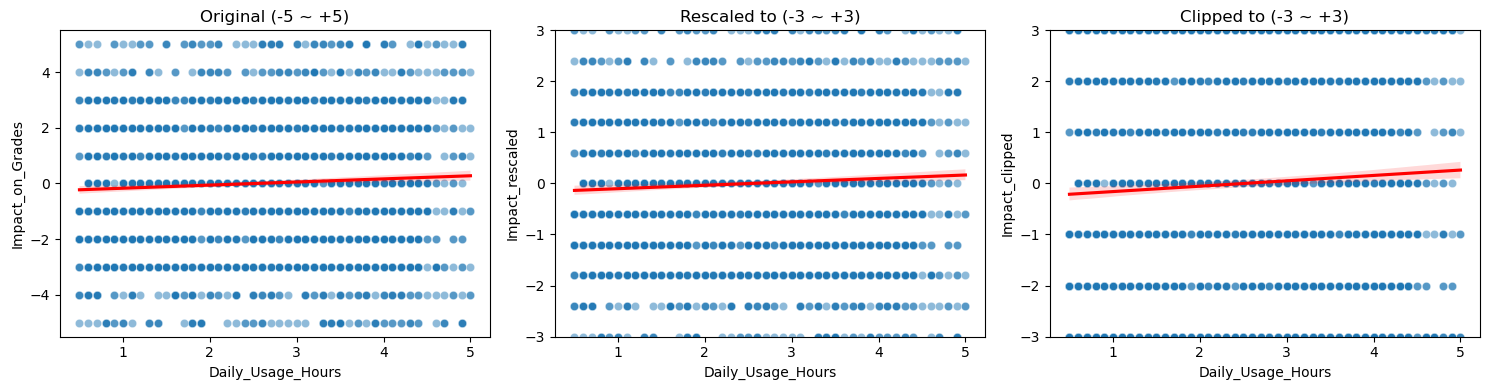

In [137]:
# Generate three versions of the "Impact on Grades" metric:
# a) Original scale (-5 to 5 or wider)
# b) Linearly scaled to -3 to 3 (preserving relative differences, consistent with "Data Description")
# c) Winsorized to -3 to 3 (a simple misleading method that flattens extreme values)

def rescale(x, old_min=-5, old_max=5, new_min=-3, new_max=3):
    return (x - old_min) * (new_max - new_min) / (old_max - old_min) + new_min

df = df.copy()
df["Impact_rescaled"] = rescale(df["Impact_on_Grades"])
df["Impact_clipped"]  = df["Impact_on_Grades"].clip(-3, 3)

# Tripartite Chart: Original / Scaled / clipped( 1 row and 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

configs = [
    ("Impact_on_Grades", "Original (-5 ~ +5)", None),
    ("Impact_rescaled",  "Rescaled to (-3 ~ +3)", (-3, +3)),
    ("Impact_clipped",   "Clipped to (-3 ~ +3)",  (-3, +3)),
]

for ax, (ycol, title, ylim) in zip(axes, configs):
    sns.scatterplot(x="Daily_Usage_Hours", y=ycol, data=df, alpha=0.5, ax=ax)
    sns.regplot(x="Daily_Usage_Hours", y=ycol, data=df, scatter=False, color="red", ax=ax)
    ax.set_title(title)
    ax.set_xlabel("Daily_Usage_Hours")
    ax.set_ylabel(ycol)
    if ylim is not None:
        ax.set_ylim(ylim)

plt.tight_layout()
plt.show()



As shown in the figure, there are no significant differences among the three groups, indicating that the relationship between usage time and academic performance is not sensitive to the scaling method used.  Therefore, the original data will be retained without modification.

5. Pandas Profile Report

In [138]:
# from ydata_profiling import ProfileReport

In [139]:
# profile = ProfileReport(df, title="Profiling Report")

# profile.to_file("ProfilingReport.html")

# profile.to_file("ProfilingReport.json")